<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Projects/blob/main/Interactive_VisualPresentation_Project1Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

- Jonny Tesfahun

## Opening and Loading Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

In [3]:
filename = '/content/drive/MyDrive/DojoBootCamp/Project Files/sales_predictions.csv'
df = pd.read_csv(filename)

In [4]:
#Google Colab Notebook and verify the data by using the df.head() command.  
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Cleaning Dataset Part 1

1. How many rows and columns?

    - I will use 12 columns. Since most of the items can be used to determine diffrent aspects of stores, products, and prices of the data. Thus, no column will be deleted. There is 8,523 rows.

2.  What are the datatypes of each variable?

    - Outlet_Establishment_Year is Integer Type (1)
    - Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales are Float Types (4)
    - Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type are Object Types (7)

In [5]:
df.shape

(8523, 12)

In [6]:
# Looking at data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Looking at more info than data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there duplicates? If so, drop any duplicates.

  - There looks to be no duplicates in the dataset.

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
df.duplicated().sum()

0

4. Identify missing values.
  - Outlet_Size has 2,410 missing data
  - Item_Weight has 1,463 missing data

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

  - I will also replace NaN for Outlet_Size with 'missing' to keep the statistical data but also show that there is no data for store size.

  - I will replace NaN for Item_Weight with Mean of the column. This will keep consistency in the column and dataset.

In [11]:
# Replaced 'NaN' with 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)
# Checked for any 'NaN' and showed that there was none
df['Outlet_Size'].isna().sum()

0

In [12]:
# Finding avg mean for 'Item_Weight' and creating a key
Itm_Wght_Avg = round(df['Item_Weight'].mean(), 2)
Itm_Wght_Avg

12.86

In [13]:
# Replaced 'NaN' with mean for 'Item_Weight' column
df['Item_Weight'].fillna(Itm_Wght_Avg, inplace=True)
# Checked for any missing data, looks good
df['Item_Weight'].isna().sum()

0

6. Confirm that there are no missing values after addressing them.

In [14]:
#Checking whole dataset for any 'NaN' and there is none
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

  - Item_Fat_Content column has a few typo errors such as LF, low fat, Low Fat, reg, and Regular

In [15]:
# trying to look at unique data
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
# looking at columns that may have inconsistency 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-- Fat Content Typo Errors

In [17]:
# looks like 'LF' and 'Low Fat' and 'low fat'
# And 'reg' and 'Regular' are the same
df.groupby(['Item_Fat_Content']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,4048.995,21.054330,43857.1062,631348,6.552424e+05
Low Fat,65837.520,326.541080,717390.8394,10167044,1.101503e+07
Regular,36784.405,200.970026,409413.1214,5771667,6.457454e+06
low fat,1415.455,7.313655,15071.7328,223539,2.338270e+05
reg,1502.780,7.764190,15948.6810,233923,2.295765e+05


In [18]:
# Changed 'LF' tp "Low Fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')

In [19]:
#Changed 'reg' to 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [20]:
# Changed 'low fat' to 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

In [21]:
# Now dataset in column is consistent
df.groupby(['Item_Fat_Content']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,71301.970,354.909065,776319.6784,11021931,1.190409e+07
Regular,38287.185,208.734216,425361.8024,6005590,6.687031e+06


8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

  - For more consist data and visual appeal I will round by 2 decimals columns Item_MRP & Item_Outlet_Sales
  - To get summary statistics of each (min, max, mean) for columns will use .describe()

In [22]:
# Rounding 'Item_MRP' column
df['Item_MRP'] = df['Item_MRP'].round(2)

In [23]:
# Rounding 'Item_Outlet_Sales' column
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].round(2)

In [24]:
# Rounding the 2 columns above did not change much statistically
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992810,1997.831867,2181.288926
std,4.226124,0.051598,62.275166,8.371760,1706.499605
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.825000,1987.000000,834.245000
50%,12.860000,0.053931,143.010000,1999.000000,1794.330000
75%,16.000000,0.094585,185.645000,2004.000000,3101.300000
max,21.350000,0.328391,266.890000,2009.000000,13086.960000


In [25]:
# Checking it visually 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


9. Extra Credit - Would like to show Item_Visibility as percentage. Just so the dataset can be more visually appealing and readable  

In [26]:
 # Was able to change formate of column so that data shows as percentage (1.00%), It took a while
 # I got assistance from https://stackoverflow.com/questions/54110289/pandas-dataframe-column-of-floats-to-percentage-style-error
df['Item_Visibility'] = df['Item_Visibility'].astype(float).map("{:.2%}".format)

In [27]:
df['Item_Visibility'].head()

0    1.60%
1    1.93%
2    1.68%
3    0.00%
4    0.00%
Name: Item_Visibility, dtype: object

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60%,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,1.93%,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,1.68%,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00%,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00%,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


## Visual Exploratory Data Analysis: Part 1

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

Looking for correlations

In [30]:
df.corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.024755,-0.008447,0.011567
Item_MRP,0.024755,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008447,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011567,0.567574,-0.049135,1.000000


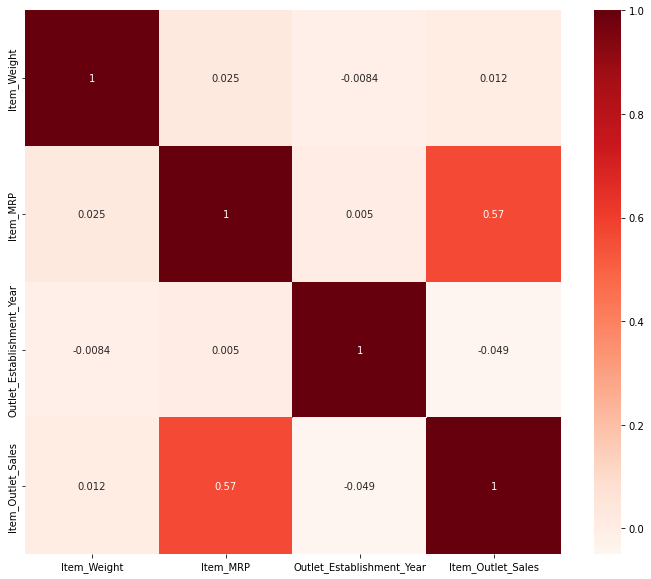

In [31]:
# Looking at the dataset correlations or lack there of
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='Reds', annot=True);

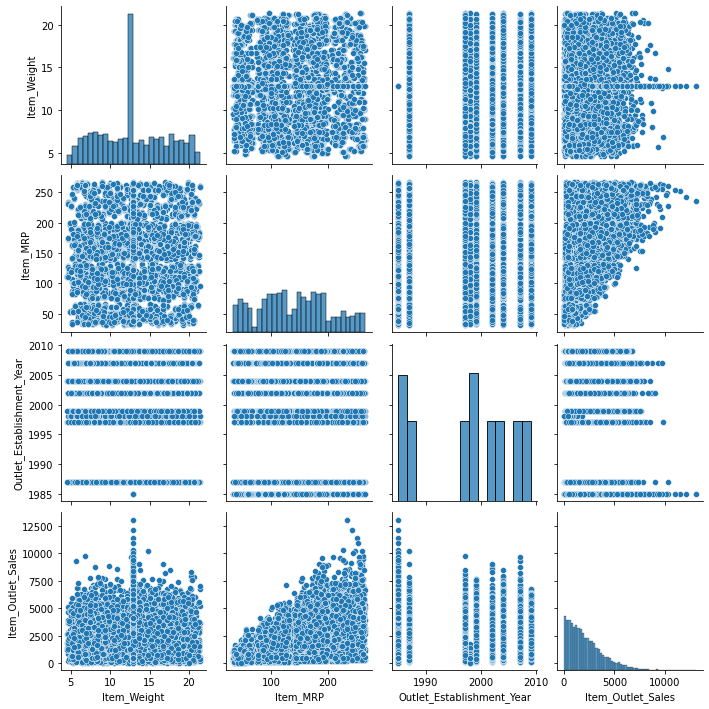

In [32]:
# Using seaborn pairplot to look for any correlations with varibles 
sns.pairplot(df)

Histogram of Item Weight

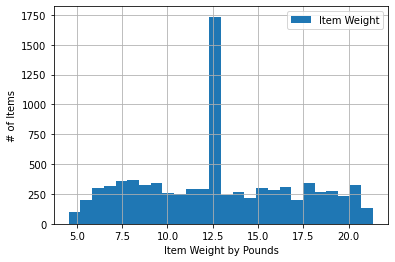

In [33]:
df['Item_Weight'].hist(label='Item Weight', bins='auto')
plt.xlabel('Item Weight by Pounds')
plt.ylabel('# of Items')
plt.legend();

Histogram of Item MRP in $ with Red color

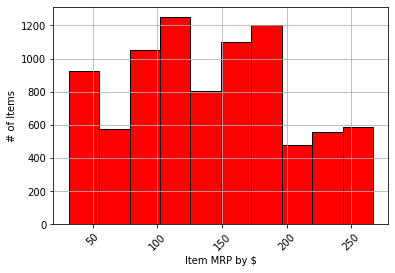

In [34]:
df['Item_MRP'].hist(bins=10, color='red', edgecolor='black')
plt.xlabel('Item MRP by $')
plt.ylabel('# of Items')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

Seaborn horizontal histogram of Store Oulet Sizes

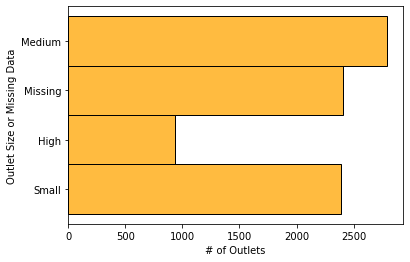

In [35]:
sns.histplot(data=df, y='Outlet_Size', color='orange')
plt.xlabel('# of Outlets')
plt.ylabel('Outlet Size or Missing Data');

Boxplot of Item_Weight and Item_MRP

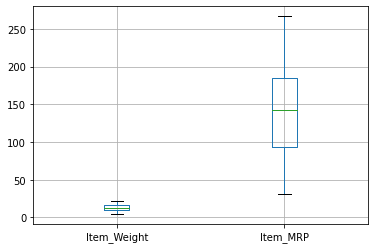

In [36]:
columns = ['Item_Weight', 'Item_MRP']
boxplot = df.boxplot(column=['Item_Weight', 'Item_MRP'])  

Boxplot of Item Outlet Sales and it shows alot of outliers

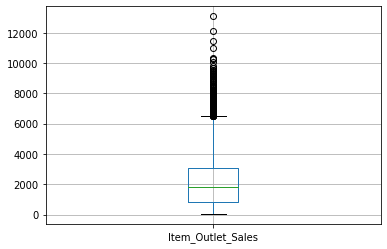

In [37]:
boxplot = df.boxplot(column=['Item_Outlet_Sales']); 

Comparing Item Outlet Sales to Outlet Size using seaborn boxplot

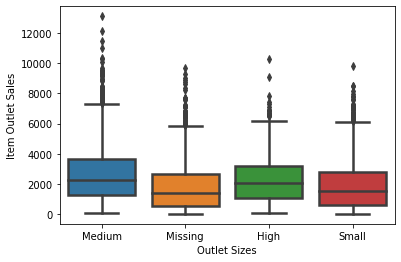

In [38]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales',data=df, linewidth=2.5)
plt.xlabel('Outlet Sizes')
plt.ylabel('Item Outlet Sales');

Scatter plot of Item MRP to Item Outlet Sales. Seems to show the higher item mrp the greater the item outlet sales.

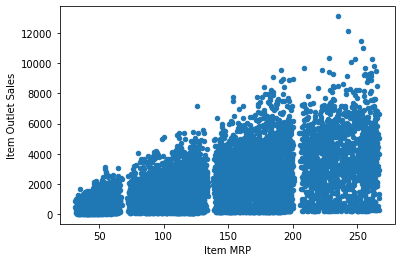

In [39]:
df.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales');

In [40]:
Item_MRP_Filter = df[(df['Item_MRP'] > 100) & (df['Item_MRP'] < 200)]

In [41]:
Outlet_Size_Weight = df.groupby('Outlet_Size')['Item_Weight'].mean()
Outlet_Size_Weight

Outlet_Size
High       13.006148
Medium     12.883562
Missing    12.778479
Small      12.850712
Name: Item_Weight, dtype: float64

Horizontal bar graph of Avg. Item of Product Weight compared to Store Size

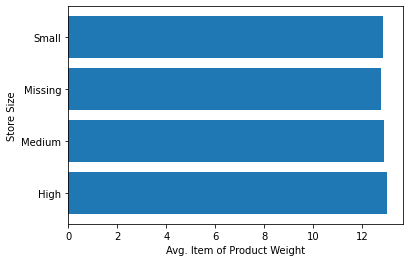

In [42]:
plt.barh(Outlet_Size_Weight.index, Outlet_Size_Weight.values)
plt.xlabel('Avg. Item of Product Weight')
plt.ylabel('Store Size');

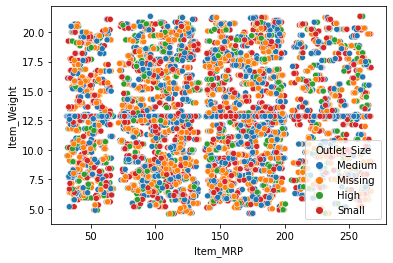

In [43]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Weight', hue='Outlet_Size');

##Data Visualizations to help your stakeholders better understand trends in the data. 

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60%,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,1.93%,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,1.68%,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00%,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00%,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


- What is the average sales for diffrent Grocery Outlet Sizes?

In [45]:
Outlet_Type_Sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
Outlet_Type_Sales

Outlet_Type
Grocery Store         339.828458
Supermarket Type1    2316.181207
Supermarket Type2    1995.498718
Supermarket Type3    3694.038396
Name: Item_Outlet_Sales, dtype: float64

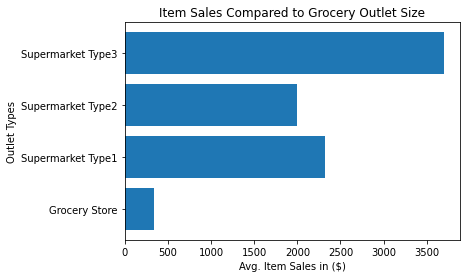

In [46]:
plt.barh(Outlet_Type_Sales.index, Outlet_Type_Sales.values)
plt.xlabel('Avg. Item Sales in ($)')
plt.ylabel('Outlet Types')
plt.title('Item Sales Compared to Grocery Outlet Size');

- How much sales are there for Outlets in Tier 3 locations?

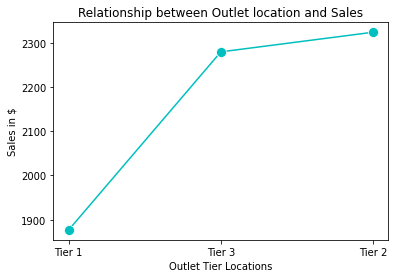

In [47]:
sns.lineplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', color= 'c', ci = None, marker= 'o', markersize = 10)
plt.xlabel('Outlet Tier Locations')
plt.ylabel('Sales in $')
plt.title('Relationship between Outlet location and Sales');

- What are Item Sales per Store Size?

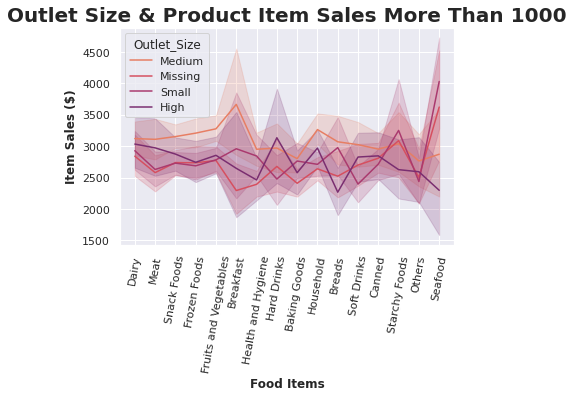

In [48]:
sns.set(style="darkgrid")    
sns.lineplot(
    data=df.query("Item_Outlet_Sales > 1000"),
    x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Size",
     palette="flare"
)
plt.xticks(rotation = 80)
plt.xlabel('Food Items', fontweight='bold')
plt.ylabel('Item Sales ($)', fontweight='bold')
plt.title('Outlet Size & Product Item Sales More Than 1000', fontsize = 20, fontweight = 'bold');

- Do Low Fat Items Cost more than Regulare Fat Items?

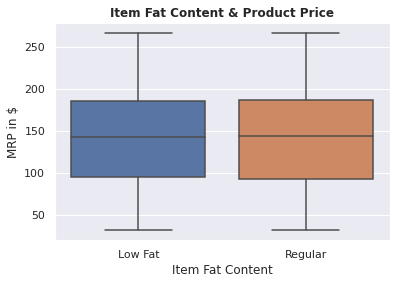

In [49]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_MRP')
plt.title('Item Fat Content & Product Price', fontweight='bold')
plt.xlabel('Item Fat Content')
plt.ylabel('MRP in $');

- Do Low Fat Items have more sales than Regulare Fat Items?

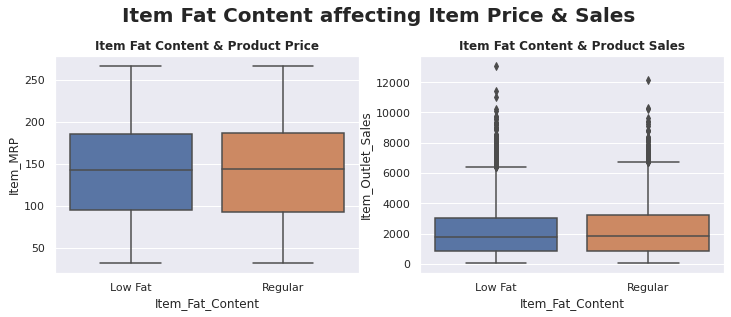

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

sns.boxplot(data=df, x='Item_Fat_Content', y='Item_MRP', ax=axes[0])
axes[0].set_title('Item Fat Content & Product Price', fontweight='bold')

sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', ax=axes[1])
axes[1].set_title('Item Fat Content & Product Sales', fontweight='bold')

fig.suptitle('Item Fat Content affecting Item Price & Sales', fontsize = 20, fontweight = 'bold', y=1.05);

- What are Product Sales and Item Prices compared to Outlet Store Sizes?

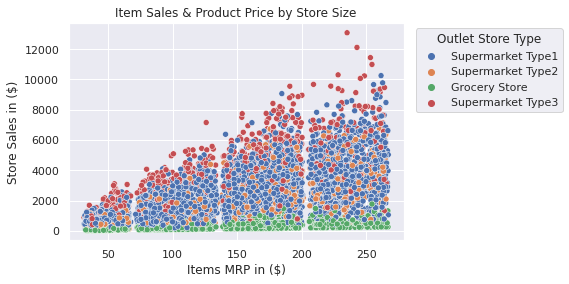

In [51]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.legend(title='Outlet Store Type',
           bbox_to_anchor=(1.02, 1))
plt.xlabel('Items MRP in ($)')
plt.ylabel('Store Sales in ($)')
plt.title('Item Sales & Product Price by Store Size');

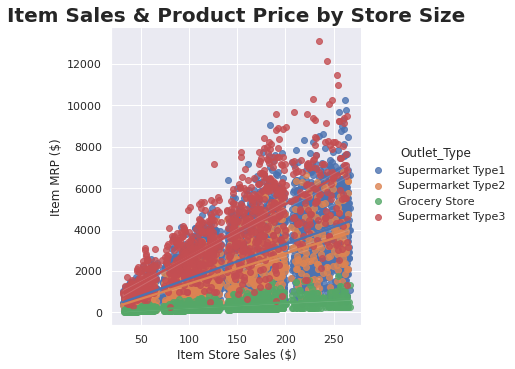

In [52]:
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Type", height=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Item Store Sales ($)", "Item MRP ($)")
plt.title('Item Sales & Product Price by Store Size', fontsize = 20, fontweight = 'bold');

##Interactive Visual Plots

In [53]:
import plotly.express as px
import cufflinks as cf
import bokeh as bk
from IPython.display import display,HTML
!pip install chart_studio
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d0cf0d0498a7a46c5b31d1bbe28d989aabc1dc94209a1dd1b9cbbe06413261d2
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   object 
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60%,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,1.93%,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,1.68%,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00%,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00%,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


Price & Sales of Meat based on Outlet Size & Type
- smaller circles = lower MRP price
- bigger circles = higher MRP price

In [56]:
fig = px.scatter(df.query("Item_Type=='Meat'"), x="Item_Outlet_Sales", y="Outlet_Size",
	         size="Item_MRP", color="Outlet_Type",
                 hover_name="Item_Identifier", log_x=True, size_max=60)
fig.show()

3d scatter Visual of Item Price, Visibility, Sales Compared to Outlet Types
- diffrent outlet types & outlet size = diffrent color & symbol
- outlet size with values as 'Missing' were removed for less clutter

In [57]:
fig = px.scatter_3d(df.query("Outlet_Size !='Missing'"), x='Item_Outlet_Sales', y='Item_Visibility', z='Item_MRP',
                    color='Outlet_Type', symbol='Outlet_Size')
fig.show()